In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from keras.layers import *
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import *
import shutil
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),activation = "relu" , input_shape = (300,300,3)))
    model.add(Conv2D(56,(3,3), activation = "relu" ))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(72,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(3,activation = "softmax"))
    model.summary()
    return model

In [3]:
create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 296, 56)      16184     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 56)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 72)      36360     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       83072     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0

In [4]:
def drawimage(image,title="eye_color"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title,fontsize=20)
    plt.show()

## Data Preparation

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [6]:
pth = Path("images/")
for file in pth.glob("*"):
    cnt=0
    for img in file.glob("*.jpg"):
        cnt+=1
    print(str(file).split("/")[-1])
    print(cnt)

images\blue
6456
images\brown
6464
images\green
6456


In [7]:
#dictionardi
digit2label ={0:"blue",1:"brown",2:"green"}

### how to create val file

In [8]:
os.listdir("images")

['blue', 'brown', 'green']

In [9]:
if not  os.path.isdir("val_img"):
    os.mkdir("./val_img")

In [10]:
print(os.listdir("val_img"))
for i in digit2label.items():
    x,y=i
    print(x)
    print(y)

['blue', 'brown', 'green']
0
blue
1
brown
2
green


In [11]:
for c in digit2label.items():
    label,l_name = c
    pth = os.path.join("val_img",l_name)
    print(pth)
    if not os.path.isdir(pth):
        print(pth)
        os.mkdir(pth)

val_img\blue
val_img\brown
val_img\green


In [12]:
print(os.listdir("val_img"))

['blue', 'brown', 'green']


In [13]:
split = 0.9
for f in os.listdir("images"):
    p = os.path.join("images/"+f)
    img = os.listdir(p)
    
    split_size = int(split*int(len(img)))
    file_2_mv = img[split_size:]
    print(len(file_2_mv))
    
    for imgfile in file_2_mv:
        src = "images/"+f+"/"+imgfile
        des = "val_img/"+f+"/"+imgfile
        
        print(src)
        print(des)
        
        shutil.move(src,des)

646
images/blue/gB53811.jpg
val_img/blue/gB53811.jpg
images/blue/gB54192.jpg
val_img/blue/gB54192.jpg
images/blue/gB54465.jpg
val_img/blue/gB54465.jpg
images/blue/gB54568.jpg
val_img/blue/gB54568.jpg
images/blue/gB54581.jpg
val_img/blue/gB54581.jpg
images/blue/gB54695.jpg
val_img/blue/gB54695.jpg
images/blue/gB54989.jpg
val_img/blue/gB54989.jpg
images/blue/gB55099.jpg
val_img/blue/gB55099.jpg
images/blue/gB55162.jpg
val_img/blue/gB55162.jpg
images/blue/gB55274.jpg
val_img/blue/gB55274.jpg
images/blue/gB55645.jpg
val_img/blue/gB55645.jpg
images/blue/gB56652.jpg
val_img/blue/gB56652.jpg
images/blue/gB56786.jpg
val_img/blue/gB56786.jpg
images/blue/gB56806.jpg
val_img/blue/gB56806.jpg
images/blue/gB57015.jpg
val_img/blue/gB57015.jpg
images/blue/gB57168.jpg
val_img/blue/gB57168.jpg
images/blue/gB57179.jpg
val_img/blue/gB57179.jpg
images/blue/gB57425.jpg
val_img/blue/gB57425.jpg
images/blue/gB57629.jpg
val_img/blue/gB57629.jpg
images/blue/gB57979.jpg
val_img/blue/gB57979.jpg
images/blue/gB58

images/blue/gR80541.jpg
val_img/blue/gR80541.jpg
images/blue/gR80599.jpg
val_img/blue/gR80599.jpg
images/blue/gR80633.jpg
val_img/blue/gR80633.jpg
images/blue/gR80667.jpg
val_img/blue/gR80667.jpg
images/blue/gR80687.jpg
val_img/blue/gR80687.jpg
images/blue/gR80724.jpg
val_img/blue/gR80724.jpg
images/blue/gR80857.jpg
val_img/blue/gR80857.jpg
images/blue/gR80903.jpg
val_img/blue/gR80903.jpg
images/blue/gR81010.jpg
val_img/blue/gR81010.jpg
images/blue/gR81034.jpg
val_img/blue/gR81034.jpg
images/blue/gR81091.jpg
val_img/blue/gR81091.jpg
images/blue/gR81230.jpg
val_img/blue/gR81230.jpg
images/blue/gR81353.jpg
val_img/blue/gR81353.jpg
images/blue/gR81470.jpg
val_img/blue/gR81470.jpg
images/blue/gR81474.jpg
val_img/blue/gR81474.jpg
images/blue/gR81624.jpg
val_img/blue/gR81624.jpg
images/blue/gR81786.jpg
val_img/blue/gR81786.jpg
images/blue/gR81869.jpg
val_img/blue/gR81869.jpg
images/blue/gR81933.jpg
val_img/blue/gR81933.jpg
images/blue/gR82005.jpg
val_img/blue/gR82005.jpg
images/blue/gR82133.

val_img/blue/gR90445.jpg
images/blue/gR90452.jpg
val_img/blue/gR90452.jpg
images/blue/gR90587.jpg
val_img/blue/gR90587.jpg
images/blue/gR90589.jpg
val_img/blue/gR90589.jpg
images/blue/gR90597.jpg
val_img/blue/gR90597.jpg
images/blue/gR90642.jpg
val_img/blue/gR90642.jpg
images/blue/gR90651.jpg
val_img/blue/gR90651.jpg
images/blue/gR90674.jpg
val_img/blue/gR90674.jpg
images/blue/gR90676.jpg
val_img/blue/gR90676.jpg
images/blue/K00748.jpg
val_img/blue/K00748.jpg
images/blue/K01505.jpg
val_img/blue/K01505.jpg
images/blue/K85061.jpg
val_img/blue/K85061.jpg
images/blue/K85405.jpg
val_img/blue/K85405.jpg
images/blue/K85531.jpg
val_img/blue/K85531.jpg
images/blue/K86288.jpg
val_img/blue/K86288.jpg
images/blue/K86364.jpg
val_img/blue/K86364.jpg
images/blue/K86528.jpg
val_img/blue/K86528.jpg
images/blue/K86660.jpg
val_img/blue/K86660.jpg
images/blue/K86666.jpg
val_img/blue/K86666.jpg
images/blue/K86687.jpg
val_img/blue/K86687.jpg
images/blue/K87691.jpg
val_img/blue/K87691.jpg
images/blue/K87909.

val_img/blue/R84418.jpg
images/blue/R84547.jpg
val_img/blue/R84547.jpg
images/blue/R84601.jpg
val_img/blue/R84601.jpg
images/blue/R84630.jpg
val_img/blue/R84630.jpg
images/blue/R84817.jpg
val_img/blue/R84817.jpg
images/blue/R84854.jpg
val_img/blue/R84854.jpg
images/blue/R84915.jpg
val_img/blue/R84915.jpg
images/blue/R85100.jpg
val_img/blue/R85100.jpg
images/blue/R85136.jpg
val_img/blue/R85136.jpg
images/blue/R85283.jpg
val_img/blue/R85283.jpg
images/blue/R85302.jpg
val_img/blue/R85302.jpg
images/blue/R85311.jpg
val_img/blue/R85311.jpg
images/blue/R85397.jpg
val_img/blue/R85397.jpg
images/blue/R85398.jpg
val_img/blue/R85398.jpg
images/blue/R85481.jpg
val_img/blue/R85481.jpg
images/blue/R85570.jpg
val_img/blue/R85570.jpg
images/blue/R85792.jpg
val_img/blue/R85792.jpg
images/blue/R85834.jpg
val_img/blue/R85834.jpg
images/blue/R85840.jpg
val_img/blue/R85840.jpg
images/blue/R85853.jpg
val_img/blue/R85853.jpg
images/blue/R85878.jpg
val_img/blue/R85878.jpg
images/blue/R85940.jpg
val_img/blue/

images/brown/K01992.jpg
val_img/brown/K01992.jpg
images/brown/K85009.jpg
val_img/brown/K85009.jpg
images/brown/K85045.jpg
val_img/brown/K85045.jpg
images/brown/K85091.jpg
val_img/brown/K85091.jpg
images/brown/K85107.jpg
val_img/brown/K85107.jpg
images/brown/K85156.jpg
val_img/brown/K85156.jpg
images/brown/K85158.jpg
val_img/brown/K85158.jpg
images/brown/K85189.jpg
val_img/brown/K85189.jpg
images/brown/K85264.jpg
val_img/brown/K85264.jpg
images/brown/K85320.jpg
val_img/brown/K85320.jpg
images/brown/K85329.jpg
val_img/brown/K85329.jpg
images/brown/K85450.jpg
val_img/brown/K85450.jpg
images/brown/K85464.jpg
val_img/brown/K85464.jpg
images/brown/K85494.jpg
val_img/brown/K85494.jpg
images/brown/K85507.jpg
val_img/brown/K85507.jpg
images/brown/K85514.jpg
val_img/brown/K85514.jpg
images/brown/K85592.jpg
val_img/brown/K85592.jpg
images/brown/K85657.jpg
val_img/brown/K85657.jpg
images/brown/K85689.jpg
val_img/brown/K85689.jpg
images/brown/K85831.jpg
val_img/brown/K85831.jpg
images/brown/K85876.

val_img/brown/R35063.jpg
images/brown/R35124.jpg
val_img/brown/R35124.jpg
images/brown/R35156.jpg
val_img/brown/R35156.jpg
images/brown/R35165.jpg
val_img/brown/R35165.jpg
images/brown/R35308.jpg
val_img/brown/R35308.jpg
images/brown/R35309.jpg
val_img/brown/R35309.jpg
images/brown/R35331.jpg
val_img/brown/R35331.jpg
images/brown/R35349.jpg
val_img/brown/R35349.jpg
images/brown/R35364.jpg
val_img/brown/R35364.jpg
images/brown/R35374.jpg
val_img/brown/R35374.jpg
images/brown/R35380.jpg
val_img/brown/R35380.jpg
images/brown/R35394.jpg
val_img/brown/R35394.jpg
images/brown/R35414.jpg
val_img/brown/R35414.jpg
images/brown/R35432.jpg
val_img/brown/R35432.jpg
images/brown/R35517.jpg
val_img/brown/R35517.jpg
images/brown/R35527.jpg
val_img/brown/R35527.jpg
images/brown/R35603.jpg
val_img/brown/R35603.jpg
images/brown/R35626.jpg
val_img/brown/R35626.jpg
images/brown/R35629.jpg
val_img/brown/R35629.jpg
images/brown/R35766.jpg
val_img/brown/R35766.jpg
images/brown/R35801.jpg
val_img/brown/R35801

images/brown/R40503.jpg
val_img/brown/R40503.jpg
images/brown/R40504.jpg
val_img/brown/R40504.jpg
images/brown/R40519.jpg
val_img/brown/R40519.jpg
images/brown/R40528.jpg
val_img/brown/R40528.jpg
images/brown/R40538.jpg
val_img/brown/R40538.jpg
images/brown/R40540.jpg
val_img/brown/R40540.jpg
images/brown/R40541.jpg
val_img/brown/R40541.jpg
images/brown/R40544.jpg
val_img/brown/R40544.jpg
images/brown/R40553.jpg
val_img/brown/R40553.jpg
images/brown/R40555.jpg
val_img/brown/R40555.jpg
images/brown/R40558.jpg
val_img/brown/R40558.jpg
images/brown/R40560.jpg
val_img/brown/R40560.jpg
images/brown/R40570.jpg
val_img/brown/R40570.jpg
images/brown/R40572.jpg
val_img/brown/R40572.jpg
images/brown/R40595.jpg
val_img/brown/R40595.jpg
images/brown/R40612.jpg
val_img/brown/R40612.jpg
images/brown/R40614.jpg
val_img/brown/R40614.jpg
images/brown/R40627.jpg
val_img/brown/R40627.jpg
images/brown/R40631.jpg
val_img/brown/R40631.jpg
images/brown/R40641.jpg
val_img/brown/R40641.jpg
images/brown/R40644.

images/brown/R41900.jpg
val_img/brown/R41900.jpg
images/brown/R41903.jpg
val_img/brown/R41903.jpg
images/brown/R41916.jpg
val_img/brown/R41916.jpg
images/brown/R41920.jpg
val_img/brown/R41920.jpg
images/brown/R41963.jpg
val_img/brown/R41963.jpg
images/brown/R41972.jpg
val_img/brown/R41972.jpg
images/brown/R41973.jpg
val_img/brown/R41973.jpg
images/brown/R41976.jpg
val_img/brown/R41976.jpg
images/brown/R41981.jpg
val_img/brown/R41981.jpg
images/brown/R41999.jpg
val_img/brown/R41999.jpg
images/brown/R42002.jpg
val_img/brown/R42002.jpg
images/brown/R42005.jpg
val_img/brown/R42005.jpg
images/brown/R42032.jpg
val_img/brown/R42032.jpg
images/brown/R42056.jpg
val_img/brown/R42056.jpg
images/brown/R42057.jpg
val_img/brown/R42057.jpg
images/brown/R42064.jpg
val_img/brown/R42064.jpg
images/brown/R42083.jpg
val_img/brown/R42083.jpg
images/brown/R42095.jpg
val_img/brown/R42095.jpg
images/brown/R42102.jpg
val_img/brown/R42102.jpg
images/brown/R42121.jpg
val_img/brown/R42121.jpg
images/brown/R42124.

images/green/gR86567.jpg
val_img/green/gR86567.jpg
images/green/gR86815.jpg
val_img/green/gR86815.jpg
images/green/gR86890.jpg
val_img/green/gR86890.jpg
images/green/gR86898.jpg
val_img/green/gR86898.jpg
images/green/gR87010.jpg
val_img/green/gR87010.jpg
images/green/gR87065.jpg
val_img/green/gR87065.jpg
images/green/gR87186.jpg
val_img/green/gR87186.jpg
images/green/gR87310.jpg
val_img/green/gR87310.jpg
images/green/gR87618.jpg
val_img/green/gR87618.jpg
images/green/gR87861.jpg
val_img/green/gR87861.jpg
images/green/gR87892.jpg
val_img/green/gR87892.jpg
images/green/gR88000.jpg
val_img/green/gR88000.jpg
images/green/gR88003.jpg
val_img/green/gR88003.jpg
images/green/gR88033.jpg
val_img/green/gR88033.jpg
images/green/gR88356.jpg
val_img/green/gR88356.jpg
images/green/gR88454.jpg
val_img/green/gR88454.jpg
images/green/gR88464.jpg
val_img/green/gR88464.jpg
images/green/gR88472.jpg
val_img/green/gR88472.jpg
images/green/K00231.jpg
val_img/green/K00231.jpg
images/green/K00825.jpg
val_img/g

val_img/green/K98591.jpg
images/green/K98664.jpg
val_img/green/K98664.jpg
images/green/K99198.jpg
val_img/green/K99198.jpg
images/green/K99214.jpg
val_img/green/K99214.jpg
images/green/K99266.jpg
val_img/green/K99266.jpg
images/green/K99368.jpg
val_img/green/K99368.jpg
images/green/K99588.jpg
val_img/green/K99588.jpg
images/green/K99721.jpg
val_img/green/K99721.jpg
images/green/K99989.jpg
val_img/green/K99989.jpg
images/green/M00151.jpg
val_img/green/M00151.jpg
images/green/M00247.jpg
val_img/green/M00247.jpg
images/green/M00661.jpg
val_img/green/M00661.jpg
images/green/M00783.jpg
val_img/green/M00783.jpg
images/green/M00822.jpg
val_img/green/M00822.jpg
images/green/M00919.jpg
val_img/green/M00919.jpg
images/green/M00943.jpg
val_img/green/M00943.jpg
images/green/M00945.jpg
val_img/green/M00945.jpg
images/green/M00980.jpg
val_img/green/M00980.jpg
images/green/M01220.jpg
val_img/green/M01220.jpg
images/green/M01575.jpg
val_img/green/M01575.jpg
images/green/M01636.jpg
val_img/green/M01636

images/green/M29295.jpg
val_img/green/M29295.jpg
images/green/M29650.jpg
val_img/green/M29650.jpg
images/green/M29723.jpg
val_img/green/M29723.jpg
images/green/M29799.jpg
val_img/green/M29799.jpg
images/green/M29861.jpg
val_img/green/M29861.jpg
images/green/M30035.jpg
val_img/green/M30035.jpg
images/green/M30059.jpg
val_img/green/M30059.jpg
images/green/M30350.jpg
val_img/green/M30350.jpg
images/green/M30495.jpg
val_img/green/M30495.jpg
images/green/M30900.jpg
val_img/green/M30900.jpg
images/green/M31114.jpg
val_img/green/M31114.jpg
images/green/M31146.jpg
val_img/green/M31146.jpg
images/green/M31180.jpg
val_img/green/M31180.jpg
images/green/M31204.jpg
val_img/green/M31204.jpg
images/green/M31292.jpg
val_img/green/M31292.jpg
images/green/M31365.jpg
val_img/green/M31365.jpg
images/green/M31412.jpg
val_img/green/M31412.jpg
images/green/M31494.jpg
val_img/green/M31494.jpg
images/green/M31636.jpg
val_img/green/M31636.jpg
images/green/M31743.jpg
val_img/green/M31743.jpg
images/green/M31834.

images/green/R87618.jpg
val_img/green/R87618.jpg
images/green/R87861.jpg
val_img/green/R87861.jpg
images/green/R87892.jpg
val_img/green/R87892.jpg
images/green/R88000.jpg
val_img/green/R88000.jpg
images/green/R88003.jpg
val_img/green/R88003.jpg
images/green/R88033.jpg
val_img/green/R88033.jpg
images/green/R88356.jpg
val_img/green/R88356.jpg
images/green/R88454.jpg
val_img/green/R88454.jpg
images/green/R88464.jpg
val_img/green/R88464.jpg
images/green/R88472.jpg
val_img/green/R88472.jpg


In [14]:
len(os.listdir("val_img/green/"))

836

### ImageGenerator

In [15]:
image_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [16]:
img_gen_dir = image_gen.flow_from_directory("images/",
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical',
        subset = 'training'                                                              
            )

Found 13950 images belonging to 3 classes.


In [17]:
label ,cnt_label = np.unique(img_gen_dir.labels,return_counts = True)
print(label,cnt_label)

[0 1 2] [4648 4654 4648]


************************************************************
(32, 300, 300, 3)
(32, 3)
0


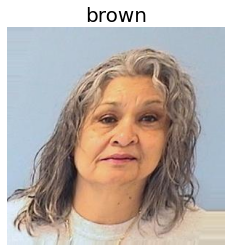

************************************************************
(32, 300, 300, 3)
(32, 3)
32


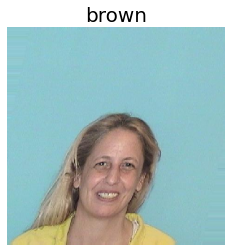

************************************************************
(32, 300, 300, 3)
(32, 3)
64


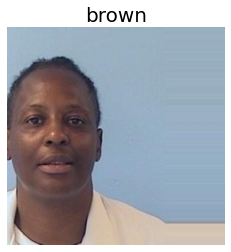

************************************************************
(32, 300, 300, 3)
(32, 3)
96


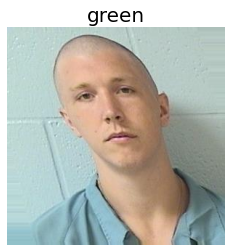

************************************************************
(32, 300, 300, 3)
(32, 3)
128


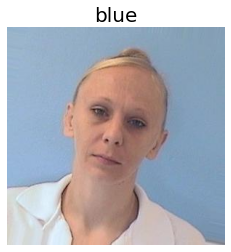

************************************************************
(32, 300, 300, 3)
(32, 3)
160


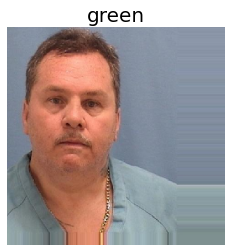

************************************************************
(32, 300, 300, 3)
(32, 3)
192


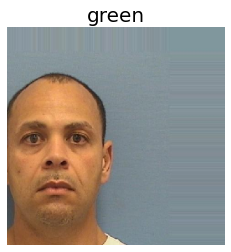

In [18]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  img_gen_dir:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    drawimage(x[1],digit2label[y[1].argmax()])

    cnt+=x.shape[0]
    if cnt > 200:
        break

In [19]:
validation_generator = image_gen.flow_from_directory(
        'images/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical',
        subset = "validation"
)

Found 3487 images belonging to 3 classes.


************************************************************
(32, 300, 300, 3)
(32, 3)
0


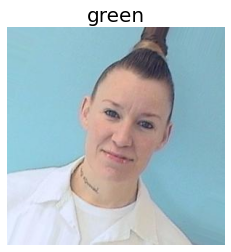

************************************************************
(32, 300, 300, 3)
(32, 3)
32


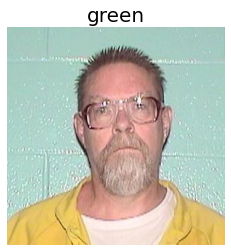

In [20]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    
    #image draw
    drawimage(x[1],digit2label[y[1].argmax()])
    cnt+=x.shape[0]
    if cnt > 50:
        break

In [21]:
print(img_gen_dir.samples)
print(validation_generator.samples)

13950
3487


## Training Our Model

In [22]:
from keras.optimizers import Adam
adam = Adam(lr = 1e-04)

In [23]:
model = create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 296, 296, 56)      16184     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 148, 56)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 72)      36360     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 72)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       83072     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 128)      

In [24]:
class_model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 296, 296, 56)      16184     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 148, 148, 56)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 72)      36360     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 72)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 128)       83072     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 128)      

In [25]:
class_model.compile(optimizer=adam ,loss = "categorical_crossentropy",metrics=["accuracy"])

In [26]:
batchsize = 32
n_epoch = 20

In [27]:

# Creating a ModelCheckpoint callback object to save the model according to the value of val_accuracy.

checkpoint = ModelCheckpoint(filepath=f"final_cnn_model_checkpoint.tf",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )



In [28]:
hist = class_model.fit(img_gen_dir
                                ,steps_per_epoch=img_gen_dir.samples//batchsize,
                                epochs=n_epoch,
                                 validation_data=validation_generator,
                                 callbacks=[checkpoint],
                                 validation_steps=validation_generator.samples//batchsize
                                )

Epoch 1/20
435/435 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.5563
Epoch 00001: val_accuracy improved from -inf to 0.65017, saving model to final_cnn_model_checkpoint.tf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_cnn_model_checkpoint.tf\assets
435/435 [==============================] - 3709s 9s/step - loss: 0.8817 - accuracy: 0.5563 - val_loss: 0.7157 - val_accuracy: 0.6502
Epoch 2/20
435/435 [==============================] - ETA: 0s - loss: 0.7342 - accuracy: 0.6454
Epoch 00002: val_accuracy did not improve from 0.65017
435/435 [==============================] - 3589s 8s/step - loss: 0.7342 - accuracy: 0.6454 - val_loss: 0.7085 - val_accuracy: 0.6363
Epoch 3/20
435/435 [==============================] - ETA: 0s - loss: 0.6694 -

## Graph Plot

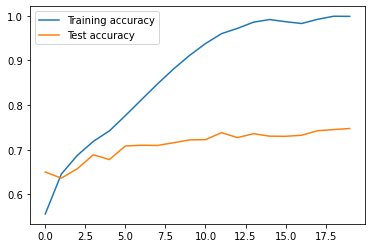

In [29]:
plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Test accuracy")
plt.legend()

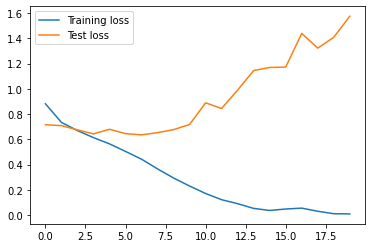

In [30]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Test loss")
plt.legend()

### Prediction

In [31]:
pred = class_model.predict(x)
pred[0]

array([5.9158922e-13, 1.0000000e+00, 4.0619105e-11], dtype=float32)

************************************************************
(32, 300, 300, 3)
(32, 3)
0


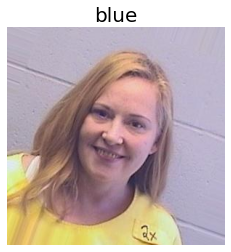

************************************************************
(32, 300, 300, 3)
(32, 3)
1


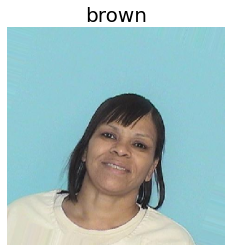

************************************************************
(32, 300, 300, 3)
(32, 3)
2


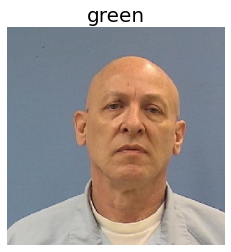

************************************************************
(32, 300, 300, 3)
(32, 3)
3


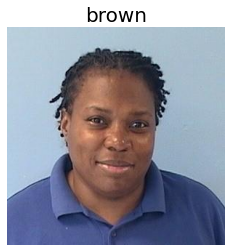

************************************************************
(32, 300, 300, 3)
(32, 3)
4


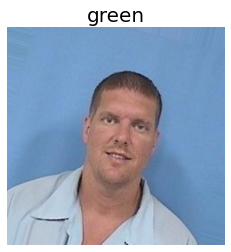

************************************************************
(32, 300, 300, 3)
(32, 3)
5


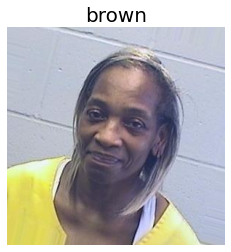

************************************************************
(32, 300, 300, 3)
(32, 3)
6


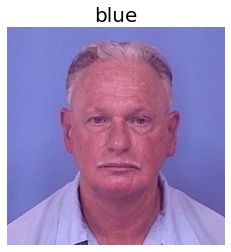

************************************************************
(32, 300, 300, 3)
(32, 3)
7


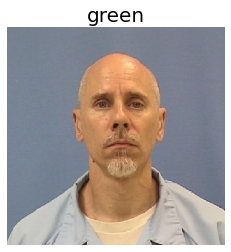

************************************************************
(32, 300, 300, 3)
(32, 3)
8


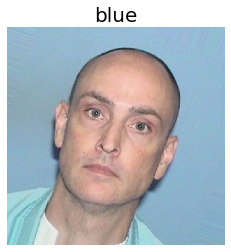

************************************************************
(32, 300, 300, 3)
(32, 3)
9


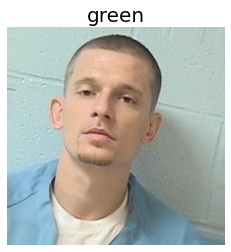

************************************************************
(32, 300, 300, 3)
(32, 3)
10


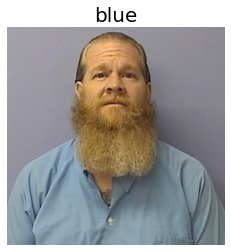

************************************************************
(32, 300, 300, 3)
(32, 3)
11


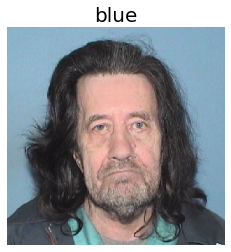

************************************************************
(32, 300, 300, 3)
(32, 3)
12


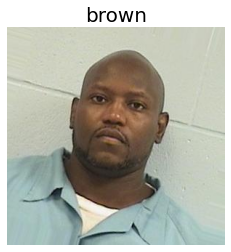

************************************************************
(32, 300, 300, 3)
(32, 3)
13


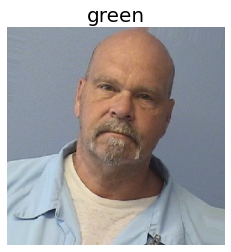

************************************************************
(32, 300, 300, 3)
(32, 3)
14


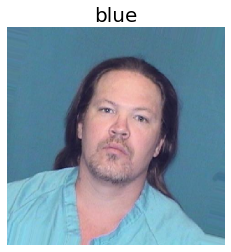

************************************************************
(32, 300, 300, 3)
(32, 3)
15


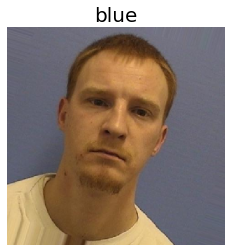

************************************************************
(32, 300, 300, 3)
(32, 3)
16


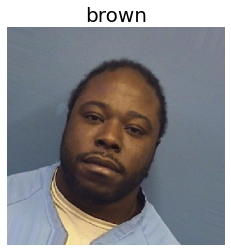

************************************************************
(32, 300, 300, 3)
(32, 3)
17


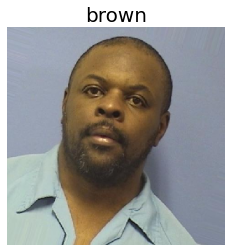

************************************************************
(32, 300, 300, 3)
(32, 3)
18


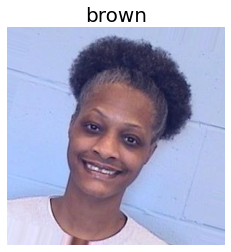

************************************************************
(32, 300, 300, 3)
(32, 3)
19


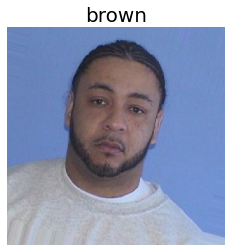

************************************************************
(32, 300, 300, 3)
(32, 3)
20


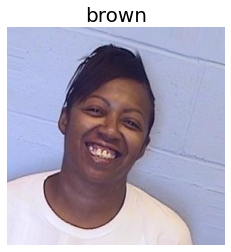

In [32]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    pred = class_model.predict(x)
    #image draw
    drawimage(x[0],digit2label[pred[0].argmax()])
    cnt+=1
    if cnt > 20:
        break